# 07140147 José Luis Hernández
##  Tarea 01

###  librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Datasets
###### se aplico 2 dataset csv local, y  2 csv online

In [2]:
ventas_aptos = pd.read_csv('ventas_apartamentos.csv')
ventas_aptos.head(2)

,datesold,postcode,price,propertyType,bedrooms
0,07/02/2007 00:00,2607.0,525000,house,4
1,27/02/2007 00:00,2906.0,290000,house,3


In [4]:
ventas_botes = pd.read_csv('ventas_botes.csv')
ventas_botes.head(2)

,Price,Boat Type,Manufacturer,Type,Type2,Length,Width,Material,Location,Number of views last 7 days
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,29.0,4.0,1.9,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,3490,Center console boat,Terhi power boats,new boat from stock,25.0,4.0,1.5,Thermoplastic,Germany Â» BÃ¶nningstedt,75


In [6]:
gracefo_nasa = pd.read_csv('https://podaac-tools.jpl.nasa.gov/drive/files/allData/gracefo/docs/GRACE_GRACE-FO_Months_RL06.csv')
gracefo_nasa.head(2)

,Month Sr No,GRACE/GRACE-FO record index,MONTH,YEAR,START DAY,YEAR.1,END DAY,COMMON MISSING DAYS,CSR unused days,GFZ unused days,JPL unused days
0,1,1.0,APR,2002,91,2002,120,"91-93, 100,101,118",NaN,117,NaN
1,2,2.0,MAY,2002,121,2002,151,"121, 128, 134, 139-151",127,127,NaN


In [25]:
dataset4 = pd.read_csv('https://data.cityofnewyork.us/api/views/7kc8-z939/rows.csv')
dataset4.head()

,Agency,"""At FCRC"" in FY 2015 (Yes/No)",FY 2015 Registration (Yes/No),Registration Date (or date sent to Comptroller for registration),$ Value for FY2015 Registrations,"DOC_CD (e.g., ""RCT1"")",DOC (agency code),DOC_ID (automatically generated contract ID number from FMS),Concession ID (pre-registration),Concessionaire,Concession Type (specific category),Concession Type (general category),Solicitation/Award Method,Start Date,Expiration Date,Revenue Collected in FY 2015,Brief Description of Concession,Borough
0,DCAS,No,No,2007,NaN,RCT1,856.0,2.007004e+10,NaN,James Miller Marina,Maritime Occupancy Permit,Occupancy/Parking Lot/ Other,Sole Source,4/1/2007,3/31/2010,36900.0,Concession property is currently used for no o...,Staten Island
1,DCAS,No,No,10/16/2006,NaN,RCT1,856.0,2.007002e+10,NaN,Dircksen & Talleyrand,Non-Maritime Occupancy Permit,Occupancy/Parking Lot/ Other,Sole Source,7/1/2006,6/30/2009,6120.0,DCAS concession property is used for no other ...,Brooklyn
2,DCAS,No,No,10/24/2006,NaN,RCT1,856.0,2.007001e+10,NaN,Williamsburgh Yacht Club,Maritime Occupancy Permit,Occupancy/Parking Lot/ Other,Sole Source,7/1/2006,6/30/2009,926.0,Use of City waterfront property for purposes r...,Queens
3,DCAS,No,No,7/10/2013,NaN,RCT1,856.0,2.013091e+10,NaN,Skaggs Walsh,Maritime Occupancy Permit,Occupancy/Parking Lot/ Other,Negotiated Concession,9/1/2013,8/31/2016,28105.0,Skaggs Walsh owns property adjacent to the per...,Queens
4,DCAS,No,No,7/10/2013,NaN,RCT1,856.0,2.013091e+10,NaN,"Villa Marin, GMC",Non-Maritime Occupancy Permit,Occupancy/Parking Lot/ Other,Negotiated Concession,9/1/2013,8/31/2016,64774.0,Concession property is currently used for the ...,Staten Island


## Funciones

In [7]:
##  imputacion media y mediana

## calculo media y rellenado de valores nulos
def ImpMeanV(df,x):
    mv = np.round(df.iloc[:,x].mean(),0)
    return(df.iloc[:,x].fillna(mv))

## calculo mediana y rellenado de valores nulos
def ImpMedianV(df,x):
    mv = np.round(df.iloc[:,x].median(),0)
    return(df.iloc[:,x].fillna(mv))

## graficado de dispersion de valores
def plt_dns_df(df,x):
    df_mean = ImpMeanV(df, x)
    df_median = ImpMedianV(df, x)
    fig = plt.figure()
    fig.add_subplot(111)
    df.iloc[:,x].plot.density(color = 'red')
    df_mean.plot.density(color = 'blue')
    df_median.plot.density(color = 'green')

## aplicacion de correlacion en relacion de la columna a imputar y la columna target (precio, revenue etc)
def FillNaN_Corr_DF(df, x, z):
    meanv = np.round(df.iloc[:,x].mean(), 0)
    medianv = np.round(df.iloc[:,x].median(), 0)
    LF_meanImp = df.iloc[:,x].fillna(meanv)
    LF_meadianImp = df.iloc[:,x].fillna(medianv)
    val_corr1 = np.corrcoef(LF_meanImp, df.iloc[:,z])
    print(val_corr1)
    val_corr2 = np.corrcoef(LF_meadianImp, df.iloc[:,z])
    print(val_corr2)
    if val_corr1[0,1] >= val_corr2[0,1]:
        df.iloc[:,x] = df.iloc[:,x].fillna(meanv)
    else:
        df.iloc[:,x] = df.iloc[:,x].fillna(medianv)

# Ejecuciones

## Ejecución Dataset 1


In [8]:
## validacion valores nulos
ventas_aptos.iloc[:,1].isnull().sum()

236

In [9]:
## imputacion media y mediana
ImpMeanV(ventas_aptos, 1)
ImpMedianV(ventas_aptos, 1)

0        2607.0
1        2906.0
2        2905.0
3        2905.0
4        2906.0
          ...  
29575    2900.0
29576    2612.0
29577    2912.0
29578    2601.0
29579    2612.0
Name: postcode, Length: 29580, dtype: float64

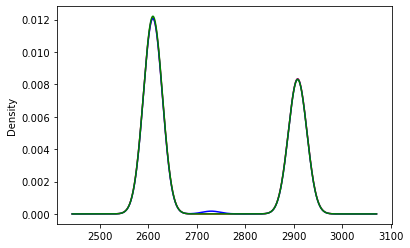

In [10]:
##  grafica de dispercion
plt_dns_df(ventas_aptos, 1)   

In [11]:
## corrrelacion, fill valores nulos,  
FillNaN_Corr_DF(ventas_aptos, 1, 2)

[[ 1.        -0.1496119]
 [-0.1496119  1.       ]]
[[ 1.         -0.14895822]
 [-0.14895822  1.        ]]


In [14]:
## validacion  final 
ventas_aptos.iloc[:,1].isnull().sum()

0

## Ejecución Dataset 2

In [15]:
## validacion valores nulos
ventas_botes.iloc[:,4].isnull().sum()

433

In [16]:
## imputacion media y media
ImpMeanV(ventas_botes, 4)
ImpMedianV(ventas_botes, 4)

0       29.0
1       25.0
2       32.0
3       32.0
4       33.0
        ... 
9883    43.0
9884    33.0
9885    39.0
9886    26.0
9887    26.0
Name: Type2, Length: 9888, dtype: float64

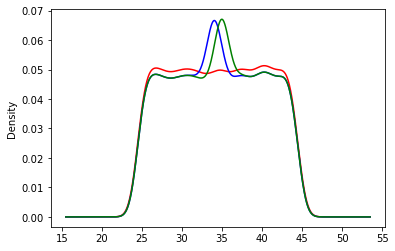

In [17]:
## grafica dispersion
plt_dns_df(ventas_botes, 4)  

In [18]:
## corrrelacion, fill valores nulos,  
FillNaN_Corr_DF(ventas_botes, 4, 0)

[[1.        0.0015512]
 [0.0015512 1.       ]]
[[1.        0.0015191]
 [0.0015191 1.       ]]


In [19]:
## validacion final
ventas_botes.iloc[:,4].isnull().sum()

0

## Ejecución dataset 3

In [20]:
# validacion valores nulos
gracefo_nasa.iloc[:,1].isnull().sum()

33

In [21]:
# imputacion media y mediana
ImpMeanV(gracefo_nasa, 1)
ImpMedianV(gracefo_nasa, 1)

0        1.0
1        2.0
2      102.0
3      102.0
4        3.0
       ...  
232    200.0
233    201.0
234    202.0
235    203.0
236    204.0
Name: GRACE/GRACE-FO record index, Length: 237, dtype: float64

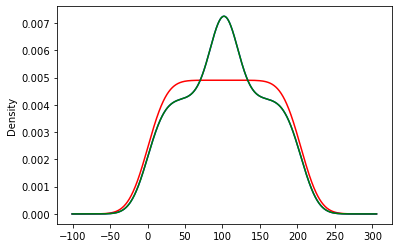

In [22]:
## graficado de dispercion
plt_dns_df(gracefo_nasa, 1)   

In [23]:
## corrrelacion, fill valores nulos,  
FillNaN_Corr_DF(gracefo_nasa, 1, 6)

[[ 1.         -0.02059417]
 [-0.02059417  1.        ]]
[[ 1.         -0.02059417]
 [-0.02059417  1.        ]]


In [24]:
## validacion final
gracefo_nasa.iloc[:,1].isnull().sum()

0

## Ejecucíon dataset 4     (ejemplo sin correlacion, unicamente imputacion con media)

In [26]:
## validacion valeres nulos
dataset4.iloc[:,6].isnull().sum()

2

In [27]:
## imputacion media y mediana
ImpMeanV(dataset4, 6)
ImpMedianV(dataset4, 6)

0      856.0
1      856.0
2      856.0
3      856.0
4      856.0
       ...  
509    801.0
510    801.0
511    801.0
512     56.0
513     56.0
Name: DOC (agency code), Length: 514, dtype: float64

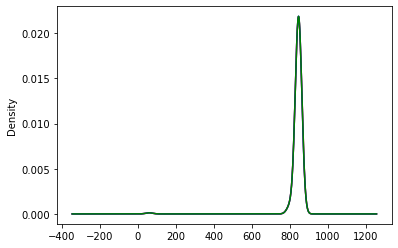

In [28]:
## graficas de dispercion 
plt_dns_df(dataset4, 6)   

In [30]:
## corrrelacion, fill valores nulos,  
FillNaN_Corr_DF(dataset4, 6, 15)

[[ 1. nan]
 [nan nan]]
[[ 1. nan]
 [nan nan]]


In [31]:
## validacion final
dataset4.iloc[:,6].isnull().sum()

0